In [5]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from energy_consumption.feature_selection.feature_collection_functions import dummy_mapping, political_instability, weather_sunhours, weather_tempandwind, production_index, prices, population
from energy_consumption.feature_selection.feature_collection_functions import get_features

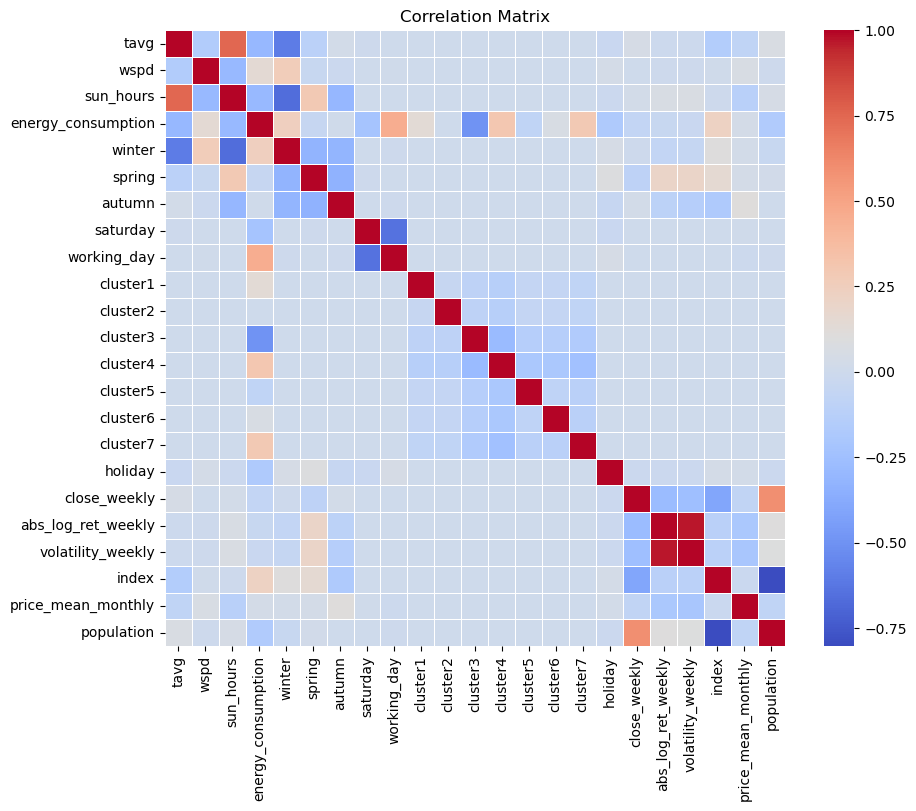

In [7]:
energydata = get_features.get_energy_and_features()


# Assuming energydata is your DataFrame
correlation_matrix = energydata.corr()

# Create a heatmap of the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=False,
            cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Correlation Matrix')
plt.show()

delete 
* autumn dummy, cluster 2
* correlation between features not higher than 0.8 --> ok
log-transform 
* price  --> didn't change anything
* close_weekly --> didn't change anything
engineer 
* add abs_log_return with volatility_weekly, check if correlation is higher --> dint't change anything

Problem: 
* population and production index: correlation = 0.8

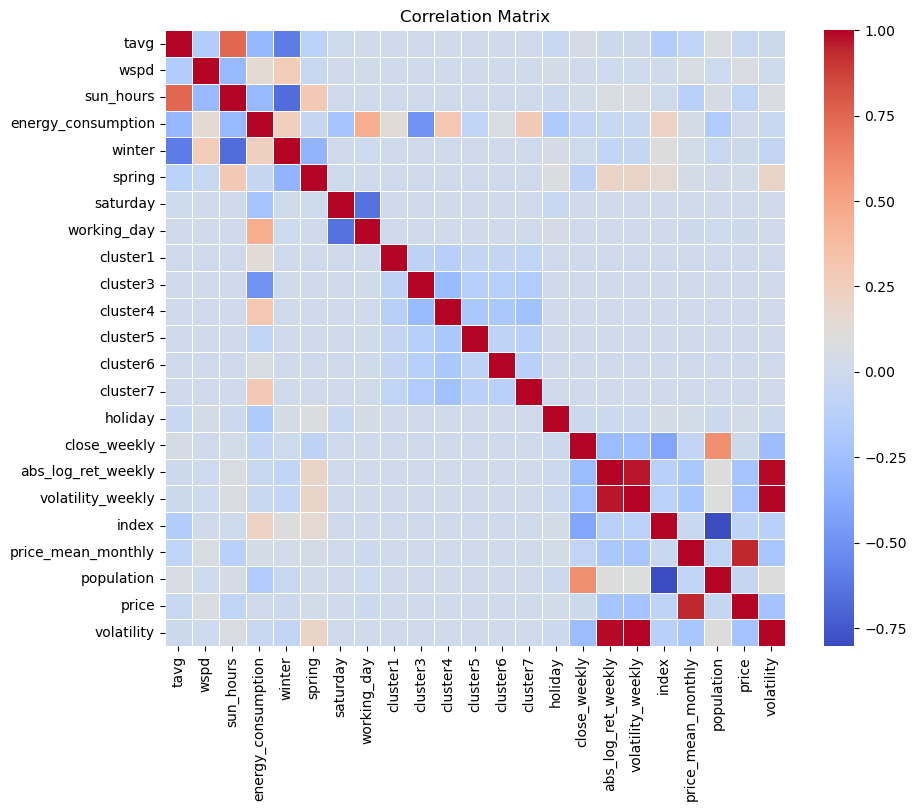

In [14]:
energydata2 = energydata.drop(columns=['autumn', 'cluster2'])
energydata2['price'] = energydata2['price_mean_monthly'].apply(lambda x: np.log1p(x))
energydata2 = energydata2.assign(
    volatility=lambda energydata2: energydata2.abs_log_ret_weekly + energydata2.volatility_weekly)

correlation_matrix2 = energydata2.corr()

# Create a heatmap of the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix2, annot=False,
            cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Correlation Matrix')
plt.show()

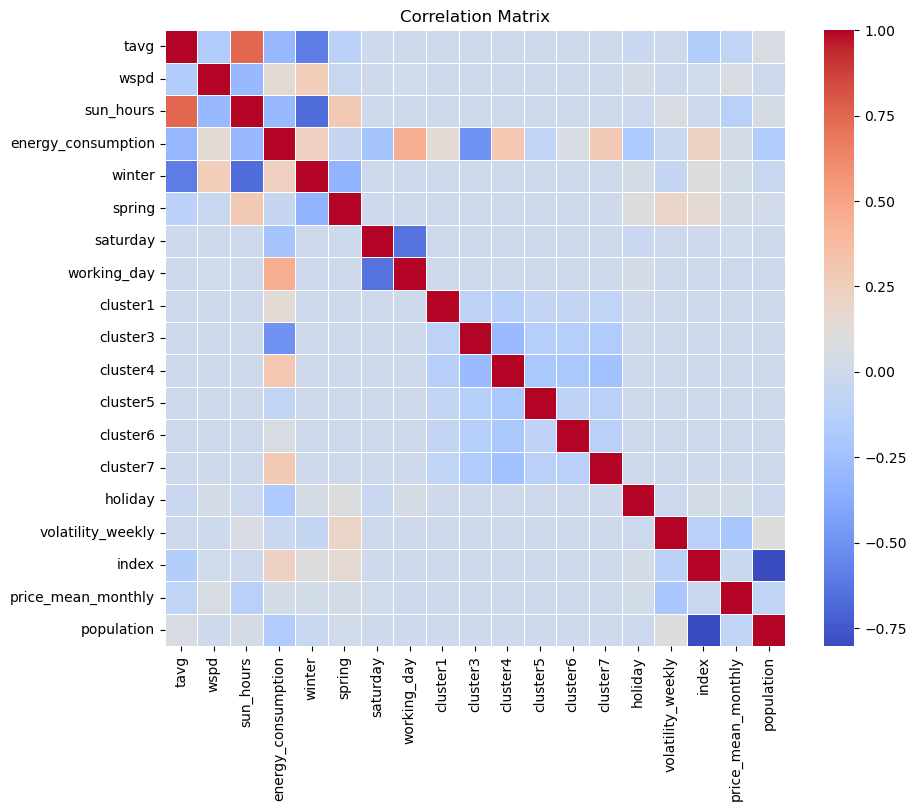

In [42]:
correlation_matrix2
energydata3 = energydata2.drop(columns=['close_weekly', 'abs_log_ret_weekly', 'volatility', 'price'])

correlation_matrix3 = energydata3.corr()

# Create a heatmap of the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix3, annot=False,
            cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Correlation Matrix')
plt.show()

After this: Changed dummy mapping to 6 clusters, season mapping only to winter and summer

Drop 
* close_weekly --> Interpretation macht kein Sinn, hingegen bei abs log ret weekly schon: höhere Volatilität (politische Unsicherheit) verringert Enerieverbrauch und NAchfrage nach Energie 
* autumn --> Korrelation zu marginal, in summer integrieren als Referenzdummy

# Standardization and Normalization 
--> high variance, different scales 

In [43]:
energydata3.var()

tavg                   55.670130
wspd                   52.823507
sun_hours               7.959374
energy_consumption     98.978513
winter                  0.182211
spring                  0.190223
saturday                0.122429
working_day             0.204059
cluster1                0.039923
cluster3                0.138911
cluster4                0.206581
cluster5                0.076389
cluster6                0.076389
cluster7                0.109394
holiday                 0.032216
volatility_weekly       0.484671
index                  39.942487
price_mean_monthly    995.253641
population              0.407180
dtype: float64

Very different standard deviations; but need for standardization depends on model to use 
--> only standardize price_mean_montly

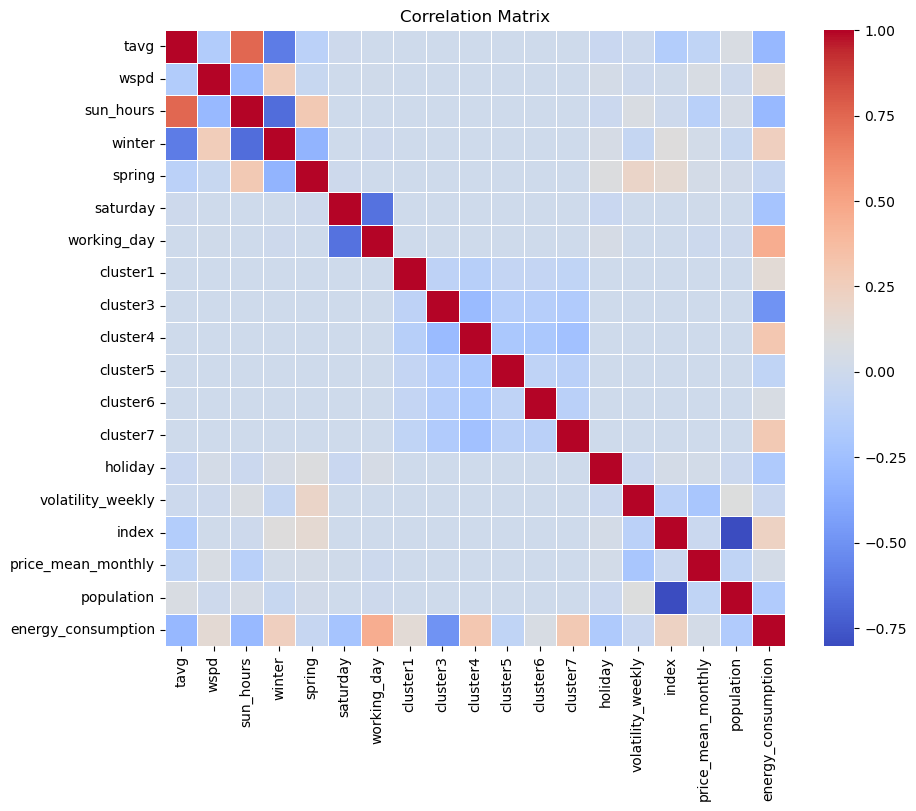

In [61]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

# Assuming X is your feature matrix (excluding the target variable 'energy_consumption')
X = energydata3.drop(columns=['energy_consumption'])
y = energydata3.reset_index()['energy_consumption']

# Create a StandardScaler instance
scaler = StandardScaler()

# Fit the scaler on your data and transform the features
X_standardized = scaler.fit_transform(X)

X_standardized_df = pd.DataFrame(X_standardized, columns=X.columns)
X_standardized_df['energy_consumption'] = y

X_standardized_df.corr()

correlation_matrix4 = X_standardized_df.corr()

# Create a heatmap of the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix4, annot=False,
            cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Correlation Matrix')
plt.show()